In [99]:
from tensorflow import keras
#from keras.datasets.imdb import 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [100]:
# imbd 불러오기
# 단어사전은 500개까지만 가져오기
# 원핫인코딩하면 500개컬럼이 생성됨
(train_input, train_target),(test_input, test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [101]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [102]:
# 숫자의 의미 : 해당되는 글자들이 있음
# 1의 의미 : 토큰시작 / 첫글자는 모두 1 
# 2의 의미 : 단어사전에 없음(500단어만 가지고 왔으므로)
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [103]:
print(train_target[:20]) # 2진분류 : 긍정- 1, 부정 - 0

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [104]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
        train_input, train_target, test_size=0.2, random_state=42
    )

In [105]:
print(train_input.shape,val_input.shape)

(20000,) (5000,)


In [106]:
len(train_input[0])

259

In [107]:
type(train_input)

numpy.ndarray

In [108]:
lengths = np.array([len(x) for x in train_input]) # 단어의 길이
lengths

array([259, 520, 290, ..., 300,  70,  77])

In [109]:
print(np.mean(lengths), np.median(lengths), np.max(lengths)) # max를 어떻게 쓸 것인지 결정해야함

239.00925 178.0 1854


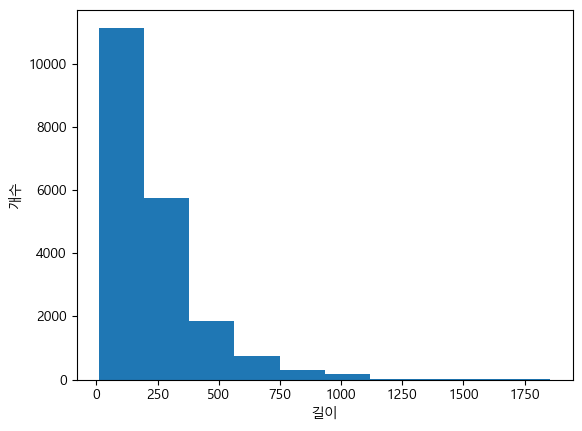

In [110]:
plt.hist(lengths)
plt.xlabel('길이')
plt.ylabel('개수')
plt.show()

In [111]:
# 시퀀스패딩 : 글자의 수을 제한해서 없는 부분은 0으로 채워줌 (단어들 중 일부만 사용)
# 최대 글자수 100으로 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input,maxlen=100)

In [112]:
train_input.shape

(20000,)

In [113]:
# 20000개 샘플, 크기 100
train_seq.shape

(20000, 100)

In [114]:
len(train_input[0])

259

In [115]:
print(train_seq[0]) # 시퀀스패딩 적용해서 0이 없으면 글자가 짤린것

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [116]:
# 시퀀스 패딩은 100개 이상의 글자를 자를 때 앞부분을 자름 => 뒤 내용이 더 중요
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [117]:
# 6번째 샘플 : 앞부분이 0으로 채워져 있음
# 100개 단어보다 적은 데이터임 : null 또는 0으로 처리
print(train_seq[5])  

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [118]:
# 검증세트
val_seq = pad_sequences(val_input,maxlen=100)

In [119]:
# 순환신경망 모델 구현
model =  keras.Sequential()
# 순환신경망 알고리즘
# 시퀀스패딩 - 100크기, 단어사전 - 500
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# 이진분류
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [120]:
# fit훈련 데이터 3차원 행렬
# to_categorical() : 
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [121]:
train_oh = keras.utils.to_categorical(train_seq)

MemoryError: Unable to allocate 7.45 GiB for an array with shape (2000000, 500) and data type float64

In [ ]:
train_seq[0][0:20]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2])

In [ ]:
train_oh[0][0][:12]  # 원핫인코딩으로 바뀌어진 형태로 출력 -  10번째 값이 1로 변경

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
# 500개 컬럼의 합은 무조건 1 - 원핫인코딩
print(np.sum(train_oh[0][0]))

1.0


In [ ]:
# val_seq 원핫인코딩
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 8)              │         4,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 인공신경망 훈련 동일

# flatten 필요없음. 원핫인코딩
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])        # 원핫인코딩을 했기 때문에 categorical/binary
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn.keras') 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)  
history = model.fit(train_oh,train_target,batch_size=64,epochs=100,                     # 원핫인코딩으로 바꾼 데이터
               validation_data=(val_oh,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

MemoryError: Unable to allocate 3.73 GiB for an array with shape (20000, 100, 500) and data type float32

In [ ]:
early_stopping_cb.stopped_epoch

32

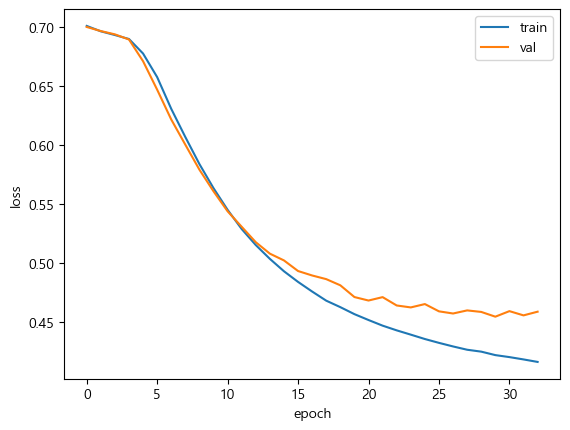

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_oh,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7876 - loss: 0.4628


[0.45476600527763367, 0.7915999889373779]

In [ ]:
test_input

array([list([1, 2, 202, 14, 31, 6, 2, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 2, 394, 354, 4, 123, 9, 2, 2, 2, 10, 10, 13, 92, 124, 89, 488, 2, 100, 28, 2, 14, 31, 23, 27, 2, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 2, 451, 202, 14, 6, 2]),
       list([1, 14, 22, 2, 6, 176, 7, 2, 88, 12, 2, 23, 2, 5, 109, 2, 4, 114, 9, 55, 2, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 2, 2, 4, 2, 2, 109, 2, 21, 4, 22, 2, 8, 6, 2, 2, 10, 10, 4, 105, 2, 35, 2, 2, 19, 2, 2, 5, 2, 2, 45, 55, 221, 15, 2, 2, 2, 14, 2, 4, 405, 5, 2, 7, 27, 85, 108, 131, 4, 2, 2, 2, 405, 9, 2, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 2, 239, 34, 2, 2, 45, 407, 31, 7, 41, 2, 105, 21, 59, 299, 12, 38, 2, 5, 2, 15, 45, 2, 488, 2, 127, 6, 52, 292, 17, 4, 2, 185, 132, 2, 2, 2, 488, 2, 47, 6, 392, 173, 4, 2, 2, 270, 2, 4, 2, 7, 4, 65, 55, 73, 11, 346, 14, 20, 9, 6, 2, 2, 7, 2, 2, 2, 5, 2, 30, 2, 2, 56, 4, 2, 5, 2, 2, 8, 4, 2, 398, 229, 10, 10, 13, 2, 2, 2, 14, 9, 31, 7, 27, 

In [ ]:
test_seq = pad_sequences(test_input,maxlen=100)
test_seq

array([[  0,   0,   0, ...,  14,   6,   2],
       [  6,   2,   2, ..., 125,   4,   2],
       [  4,   2,   7, ...,   9,  57,   2],
       ...,
       [  0,   0,   0, ...,  21,   2,   2],
       [  0,   1,  11, ...,   2,   7, 470],
       [ 56,  96, 346, ...,  34,   2,   2]])

In [ ]:
# test_input
test_oh = keras.utils.to_categorical(test_seq)
test_oh

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0.

In [ ]:
model.evaluate(test_oh,test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7908 - loss: 0.4524


[0.45172128081321716, 0.7892799973487854]

In [ ]:
# 단어 임베딩
# 원핫인코딩을 사용하지 않음 -> 임베딩층 사용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100)) # 500원핫 -> 16개의 실수벡터
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.summary()

c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_oh

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])        # 원핫인코딩을 했기 때문에 categorical/binary
checkpoint_cb = keras.callbacks.ModelCheckpoint('embedding_model.keras') 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)  
history = model2.fit(train_seq,train_target,batch_size=64,epochs=100,                     # 원핫인코딩으로 바꾼 데이터
               validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5286 - loss: 0.6916 - val_accuracy: 0.6566 - val_loss: 0.6576
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6719 - loss: 0.6471 - val_accuracy: 0.7058 - val_loss: 0.6207
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7221 - loss: 0.6112 - val_accuracy: 0.7212 - val_loss: 0.5978
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7471 - loss: 0.5803 - val_accuracy: 0.7476 - val_loss: 0.5686
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7633 - loss: 0.5525 - val_accuracy: 0.7684 - val_loss: 0.5465
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7794 - loss: 0.5329 - val_accuracy: 0.7726 - val_loss: 0.5308
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7810 - loss: 0.5177 - val_accuracy: 0.7718 - val_loss: 0.5211
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7876 - loss: 0.5045 - 

In [ ]:
early_stopping_cb.stopped_epoch

24

In [ ]:
model.evaluate(val_seq,val_target)

In [ ]:
test_seq = pad_sequences(test_input,maxlen=100)
model.evaluate(test_seq,test_target)

In [ ]:
# 딥러닝 훈련 : 인공신경망(ANN) - 1차원 배열로 전환하여 훈련
# 데이터 전처리
# train_seq = pad_sequences(train_input,maxlen=100)

# 순환신경망
# 모델결정 model = keras.Sequential()
# model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
# model.add(keras.layers.Dense(1,activation='sigmoid'))
# model.summary()

# flatten 필요없음. 원핫인코딩
# 옵티마이저 - RMSprop
# rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
# model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])        # 원핫인코딩을 했기 때문에 categorical/binary
# checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn.keras') 
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)  
# history = model.fit(train_seq,train_target,batch_size=64,epochs=100,                     # 원핫인코딩으로 바꾼 데이터
#                validation_data=(val_seq,val_target), callbacks=[checkpoint_cb,early_stopping_cb])

# 모델평가 model.evaluate(val_scaled, val_target)
# test_seq = pad_sequences(test_input,maxlen=100)
# test_seq = keras.utils.to_categorical(test_seq)
# model.evaluate(test_seq,test_target)